In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
display (os.getcwd())

'C:\\Users\\Harsha Marishetty'

In [4]:
os.chdir('C:\\Users\\Harsha Marishetty\\Downloads\\')

In [5]:
df = pd.read_csv("Dataset .csv")
display (df.head())

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
# Task 01 : Restaurant Ratings
print(df.head())
print(df.info())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

Number of 0 ratings: 2148
Counts per 1.0 interval range:
Rating Range
0-1    2148
1-2      10
2-3    1891
3-4    4388
4-5    1114
Name: count, dtype: int64


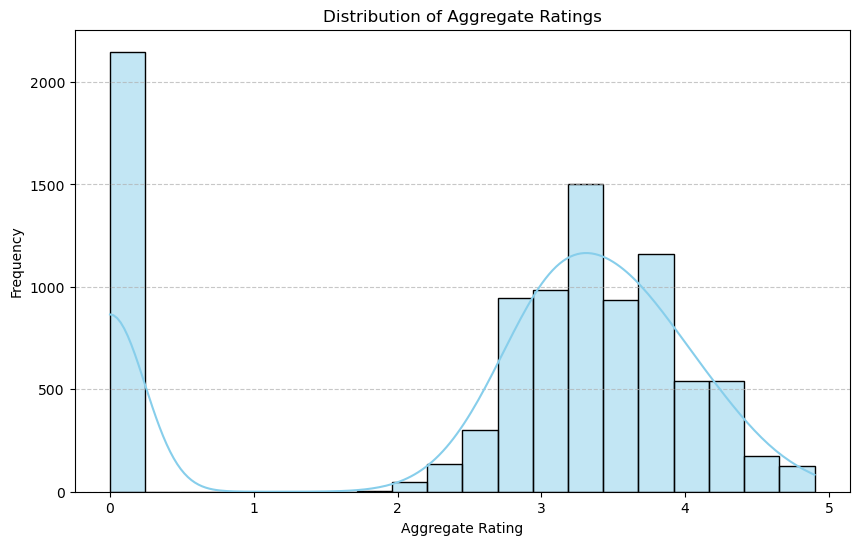

In [10]:
import seaborn as sns
zero_ratings = df[df['Aggregate rating'] == 0]
print(f"Number of 0 ratings: {len(zero_ratings)}")
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('rating_distribution.png')
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['Rating Range'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels, include_lowest=True)
range_counts = df['Rating Range'].value_counts().sort_index()
print("Counts per 1.0 interval range:")
print(range_counts)

In [11]:
most_frequent_rating = df['Aggregate rating'].mode()[0]
print(f"Most frequent specific rating: {most_frequent_rating}")
bins_05 = [x/2.0 for x in range(0, 12)] 
df['Rating Range 0.5'] = pd.cut(df['Aggregate rating'], bins=bins_05, include_lowest=True)
range_counts_05 = df['Rating Range 0.5'].value_counts().sort_values(ascending=False)
print("Top 5 most common 0.5 interval ranges:")
print(range_counts_05.head())

Most frequent specific rating: 0.0
Top 5 most common 0.5 interval ranges:
Rating Range 0.5
(3.0, 3.5]       2502
(-0.001, 0.5]    2148
(3.5, 4.0]       1886
(2.5, 3.0]       1605
(4.0, 4.5]        908
Name: count, dtype: int64


In [15]:
#average number of votes received by restaurants
average_votes = df['Votes'].mean()
print(f"Average number of votes: {average_votes}")

Average number of votes: 156.909747670401


In [16]:
 #Task 02 : Cuisine Combination

df_clean = df.dropna(subset=['Cuisines']).copy()
def normalize_cuisines(cuisine_str):
    cuisines = [c.strip() for c in cuisine_str.split(',')]
    cuisines.sort()
    return ', '.join(cuisines)
df_clean['Cuisines_Sorted'] = df_clean['Cuisines'].apply(normalize_cuisines)
cuisine_combinations = df_clean['Cuisines_Sorted'].value_counts().head(10)
print("Most common cuisine combinations:")
print(cuisine_combinations)

Most common cuisine combinations:
Cuisines_Sorted
North Indian                      936
Chinese, North Indian             616
Mughlai, North Indian             394
Fast Food                         354
Chinese                           354
Chinese, Mughlai, North Indian    306
Cafe                              299
Bakery                            218
Bakery, Desserts                  181
Chinese, Fast Food                159
Name: count, dtype: int64


In [17]:
def normalize_cuisines(cuisine_str):
    cuisines = [c.strip() for c in cuisine_str.split(',')]
    cuisines.sort()
    return ', '.join(cuisines)
df_clean['Cuisines_Sorted'] = df_clean['Cuisines'].apply(normalize_cuisines)
top_combinations = df_clean['Cuisines_Sorted'].value_counts().head(20).index
df_top_cuisines = df_clean[df_clean['Cuisines_Sorted'].isin(top_combinations)]
avg_rating_by_cuisine = df_top_cuisines.groupby('Cuisines_Sorted')['Aggregate rating'].mean().sort_values(ascending=False)
print("Average ratings for the top 20 most common cuisine combinations:")
print(avg_rating_by_cuisine)

Average ratings for the top 20 most common cuisine combinations:
Cuisines_Sorted
Chinese, Continental, North Indian     3.026168
Desserts, Ice Cream                    2.899083
Cafe                                   2.890970
Mughlai, North Indian                  2.767259
Chinese, Mughlai, North Indian         2.619935
Fast Food, Pizza                       2.582394
Bakery, Fast Food                      2.411966
Fast Food, North Indian                2.403333
Bakery, Desserts                       2.375691
South Indian                           2.370536
Chinese, North Indian                  2.333442
Chinese, North Indian, South Indian    2.205185
Street Food                            2.161745
Fast Food                              2.118362
Chinese, Fast Food                     2.069811
Chinese                                2.042090
Bakery                                 1.924312
Mithai, Street Food                    1.902985
North Indian                           1.672329
Mughlai

Count of (0,0) coordinates: 497


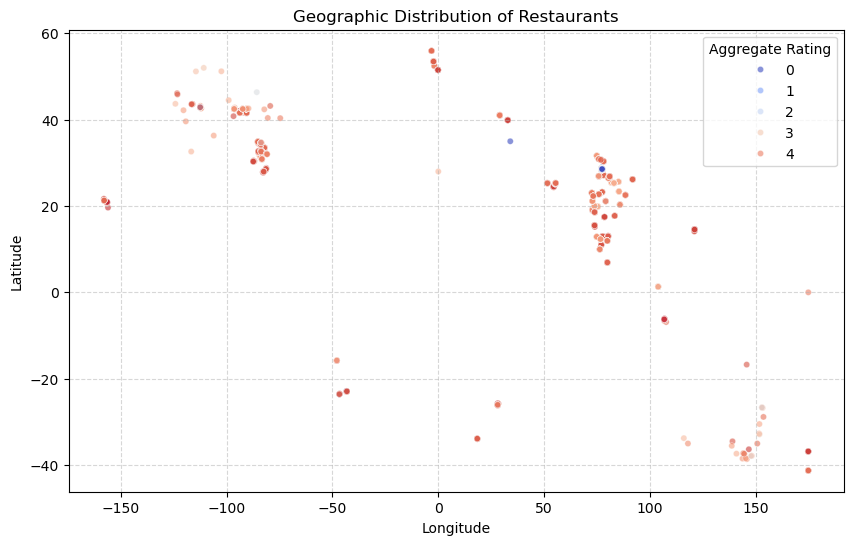

In [21]:
#Task 03 : Geographic Analysis

print(f"Count of (0,0) coordinates: {len(df[(df['Longitude'] == 0) & (df['Latitude'] == 0)])}")
df_geo = df[(df['Longitude'] != 0) | (df['Latitude'] != 0)]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=df_geo, hue='Aggregate rating', palette='coolwarm', alpha=0.6, s=20)
plt.title('Geographic Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Aggregate Rating', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

Top 10 Cities by Restaurant Count:
City
New Delhi    5240
Gurgaon      1070
Noida         987
Faridabad     229
Ghaziabad      25
Ahmedabad      21
Dubai          20
Sharjah        20
Pretoria       20
Abu Dhabi      20
Name: count, dtype: int64
Top Country Code: 1


Text(0, 0.5, 'Latitude')

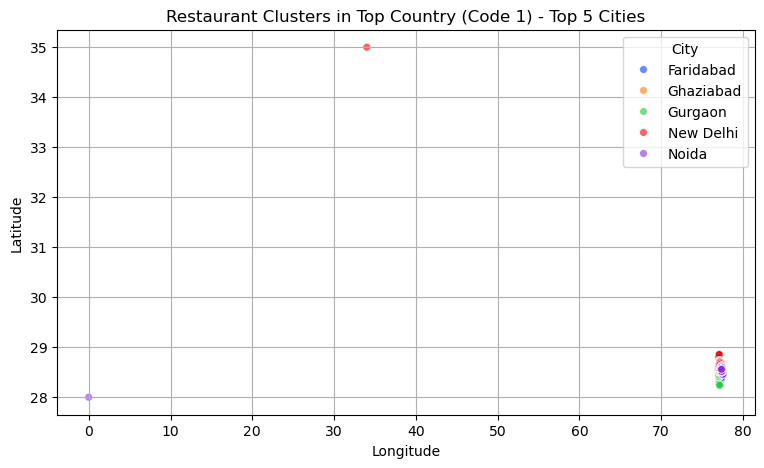

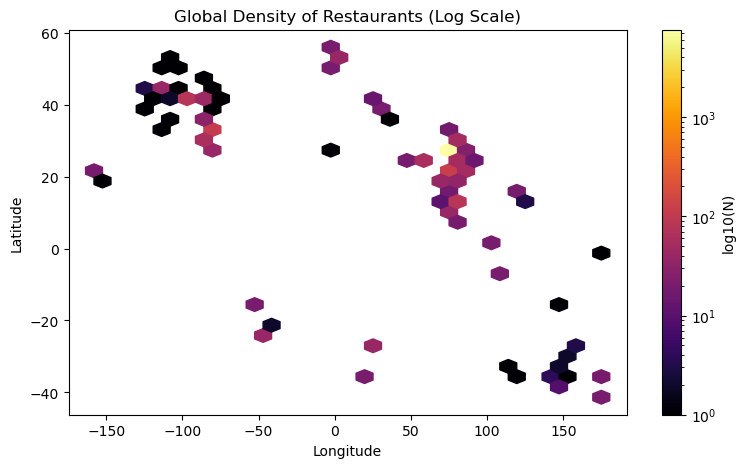

In [23]:
df_geo = df[(df['Longitude'] != 0) | (df['Latitude'] != 0)].copy()
city_counts = df_geo['City'].value_counts().head(10)
print("Top 10 Cities by Restaurant Count:")
print(city_counts)
top_country_code = df_geo['Country Code'].value_counts().idxmax()
print(f"Top Country Code: {top_country_code}")
df_top_country = df_geo[df_geo['Country Code'] == top_country_code]
plt.figure(figsize=(9, 5))
top_cities_in_country = df_top_country['City'].value_counts().head(5).index
df_top_cities_data = df_top_country[df_top_country['City'].isin(top_cities_in_country)]
sns.scatterplot(x='Longitude', y='Latitude', data=df_top_cities_data, hue='City', alpha=0.6, palette='bright', s=30)
plt.title(f'Restaurant Clusters in Top Country (Code {top_country_code}) - Top 5 Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='City')
plt.grid(True)

# Global view of clusters using a heatmap concept (hexbin)
plt.figure(figsize=(9, 5))
plt.hexbin(df_geo['Longitude'], df_geo['Latitude'], gridsize=30, cmap='inferno', mincnt=1, bins='log')
plt.colorbar(label='log10(N)')
plt.title('Global Density of Restaurants (Log Scale)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [24]:
#Task 04 : Restaurant Chains

restaurant_counts = df['Restaurant Name'].value_counts()
chains = restaurant_counts[restaurant_counts > 1]
print(f"Total number of unique restaurants: {len(restaurant_counts)}")
print(f"Number of restaurant chains identified (more than 1 outlet): {len(chains)}")
print("Top 10 Restaurant Chains by number of outlets:")
print(chains.head(10))

Total number of unique restaurants: 7446
Number of restaurant chains identified (more than 1 outlet): 734
Top 10 Restaurant Chains by number of outlets:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


In [25]:
restaurant_counts = df['Restaurant Name'].value_counts()
chains_list = restaurant_counts[restaurant_counts > 1].index
df_chains = df[df['Restaurant Name'].isin(chains_list)]
chain_stats = df_chains.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Restaurant ID': 'count'
}).rename(columns={'Restaurant ID': 'Outlets'})
top_rated_chains = chain_stats[chain_stats['Outlets'] >= 5].sort_values(by='Aggregate rating', ascending=False).head(10)
most_popular_chains = chain_stats.sort_values(by='Votes', ascending=False).head(10)
print("Top 10 Rated Chains (min 5 outlets):")
print(top_rated_chains)
print("\nTop 10 Most Popular Chains (by Votes):")
print(most_popular_chains)

Top 10 Rated Chains (min 5 outlets):
                 Aggregate rating  Votes  Outlets
Restaurant Name                                  
Chili's                  4.580000   8156        5
Farzi Cafe               4.366667  10098        6
Barbeque Nation          4.353846  28142       26
Punjab Grill             4.340000   5424        5
Mocha                    4.185714   3111        7
Texas Roadhouse          3.860000    783        5
Happy Hakka              3.860000   1471        5
TGI Friday's             3.850000   4357        6
L'Opera                  3.820000   1046        5
Starbucks                3.805556   7139       18

Top 10 Most Popular Chains (by Votes):
                           Aggregate rating  Votes  Outlets
Restaurant Name                                            
Barbeque Nation                    4.353846  28142       26
AB's - Absolute Barbecues          4.825000  13400        4
Big Chill                          4.475000  10853        4
Farzi Cafe             